In [160]:
! pip install midiutil

     |████████████████████████████████| 1.0 MB 28.8 MB/s eta 0:00:01
  Created wheel for midiutil: filename=MIDIUtil-1.2.1-py3-none-any.whl size=54566 sha256=c95451b8a6a55c082f776053dce84c41b449e4cccb92659b29822e9f12212563
  Stored in directory: /home/jovyan/.cache/pip/wheels/e3/97/cd/a677b61a76d575f373e2e10302f1d9106507fea6dd1320df03
Successfully built midiutil


In [161]:
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from midiutil import MIDIFile
import numpy as np

In [19]:
samplerate, data = wavfile.read("clairenew.wav")


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


In [4]:
samplerate

48000

In [6]:
data

array([[-287,  148],
       [-325,   75],
       [-376,   -7],
       ...,
       [-465, -855],
       [-482, -824],
       [-492, -787]], dtype=int16)

In [17]:
audio = data.mean(axis=1)
audio

array([ -69.5, -125. , -191.5, ..., -660. , -653. , -639.5])

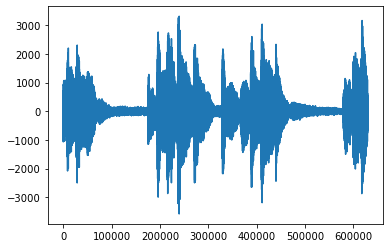

In [16]:
plt.plot(audio)

In [46]:
yf = fft(audio)
xf = fftfreq(len(audio), 1 / samplerate)

In [37]:
xf

array([ 0.        ,  0.07618262,  0.15236523, ..., -0.22854785,
       -0.15236523, -0.07618262])

In [38]:
yf

array([  9831.            -0.j        ,   1113.09593773+16619.67426197j,
       -14724.46349034-10923.12202061j, ...,
         3204.5961988  -9264.16279861j, -14724.46349034+10923.12202061j,
         1113.09593773-16619.67426197j])

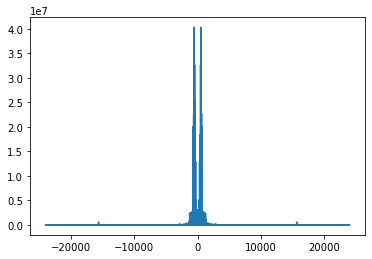

In [47]:
plt.plot(xf, np.abs(yf))

In [145]:
midiTable = {
    8.18: 0,
    8.66: 1,
    9.18: 2,
    9.72: 3,
    10.3: 4,
    10.91: 5,
    11.56: 6,
    12.25: 7,
    12.98: 8,
    13.75: 9,
    14.57: 10,
    15.43: 11,
    16.35: 12,
    17.32: 13,
    18.35: 14,
    19.45: 15,
    20.6: 16,
    21.83: 17,
    23.12: 18,
    24.5: 19,
    25.96: 20,
    27.5: 21,
    29.14: 22,
    30.87: 23,
    32.7: 24,
    34.65: 25,
    36.71: 26,
    38.89: 27,
    41.2: 28,
    43.65: 29,
    46.25: 30,
    49.0: 31,
    51.91: 32,
    55.0: 33,
    58.27: 34,
    61.74: 35,
    65.41: 36,
    69.3: 37,
    73.42: 38,
    77.78: 39,
    82.41: 40,
    87.31: 41,
    92.5: 42,
    98.0: 43,
    103.83: 44,
    110.0: 45,
    116.54: 46,
    123.47: 47,
    130.81: 48,
    138.59: 49,
    146.83: 50,
    155.56: 51,
    164.81: 52,
    174.61: 53,
    185.0: 54,
    196.0: 55,
    207.65: 56,
    220.0: 57,
    233.08: 58,
    246.94: 59,
    261.63: 60,
    277.18: 61,
    293.66: 62,
    311.13: 63,
    329.63: 64,
    349.23: 65,
    369.99: 66,
    392.0: 67,
    415.3: 68,
    440.0: 69,
    466.16: 70,
    493.88: 71,
    523.25: 72,
    554.37: 73,
    587.33: 74,
    622.25: 75,
    659.26: 76,
    698.46: 77,
    739.99: 78,
    783.99: 79,
    830.61: 80,
    880.0: 81,
    932.33: 82,
    987.77: 83,
    1046.5: 84,
    1108.73: 85,
    1174.66: 86,
    1244.51: 87,
    1318.51: 88,
    1396.91: 89,
    1479.98: 90,
    1567.98: 91,
    1661.22: 92,
    1760.0: 93,
    1864.66: 94,
    1975.53: 95,
    2093.0: 96,
    2217.46: 97,
    2349.32: 98,
    2489.02: 99,
    2637.02: 100,
    2793.83: 101,
    2959.96: 102,
    3135.96: 103,
    3322.44: 104,
    3520.0: 105,
    3729.31: 106,
    3951.07: 107,
    4186.01: 108,
    4434.92: 109,
    4698.64: 110,
    4978.03: 111,
    5274.04: 112,
    5587.65: 113,
    5919.91: 114,
    6271.93: 115,
    6644.88: 116,
    7040.0: 117,
    7458.62: 118,
    7902.13: 119,
    8372.02: 120,
    8869.84: 121,
    9397.27: 122,
    9956.06: 123,
    10548.08: 124,
    11175.3: 125,
    11839.82: 126,
    12543.85: 127
}

midiFreqs = list(midiTable.keys())

In [146]:
#https://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array

def findNearestMidiPitch(freq):
    idx = np.searchsorted(midiFreqs, freq, side="left")
    if idx > 0 and (idx == len(midiFreqs) or np.abs(freq - midiFreqs[idx-1]) < np.abs(freq - midiFreqs[idx])):
        return midiTable[midiFreqs[idx-1]]
    else:
        return midiTable[midiFreqs[idx]]

In [148]:
findNearestMidiPitch(445)

69

[{69},
 {69, 75},
 {72, 75},
 {72, 75},
 set(),
 {72, 77},
 {73, 75},
 {77},
 {73, 77},
 {73, 75, 77},
 {73, 75},
 {75},
 {75},
 {75},
 set(),
 {75},
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 {68, 77},
 {77},
 set(),
 {68, 71, 73},
 {73},
 {70, 73},
 set(),
 {73},
 {70, 75},
 {68, 73, 75},
 {73, 75},
 set(),
 {70, 72, 75},
 {70, 73},
 {73},
 {70, 73, 75},
 {70, 73},
 set(),
 {70, 73},
 {77},
 {73, 77},
 {77},
 {77},
 set(),
 set(),
 set(),
 {77},
 set(),
 set(),
 set(),
 set(),
 {73},
 {73},
 {73},
 {73},
 {73},
 {73},
 {73},
 set(),
 set(),
 {66},
 {66},
 {66},
 {63, 66},
 {63, 66, 68, 72},
 {66, 68, 72},
 {66, 72},
 {68, 72},
 {70, 73},
 {70, 73},
 {63, 70, 73},
 {70, 73},
 {73},
 {68, 73},
 {70},
 set(),
 {68, 72},
 {72},
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 s

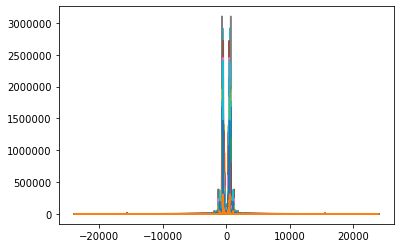

In [152]:
# https://stackoverflow.com/questions/53797199/perform-fft-for-every-second-on-wav-file-with-python

interval = .1
duration = len(data)/samplerate
frames = int(duration / interval) + 1
frameLength = int(samplerate * interval)

# np.set_printoptions(threshold=np.inf)

frameNotes = []
# loop through each frame
# for i in range(0, frames):
for i in range(0, frames):
    start = i * frameLength
    end = (i + 1) * frameLength
    frameData = audio[start:end]
    yf = fft(frameData)
    xf = fftfreq(len(frameData), 1 / samplerate)
    plt.plot(xf, np.abs(yf))
    indices, properties = find_peaks(yf, threshold=200000, distance=5)
    peakFreqs = set()
    for j in indices:
        peakFreqs.add(findNearestMidiPitch(np.abs(xf[j])))
    frameNotes.append(peakFreqs)
frameNotes

In [157]:
# create starttime, pitch and endtime

notes = []
allNotes = []
playingNotes = {}
for i in range(0, len(frameNotes)):
    currNotes = frameNotes[i]
    if i is 0:
        for note in currNotes:
            playingNotes[note] = 0
    else:
        # find which notes stopped playing
        playingNotesCopy = playingNotes.copy()
        for note in playingNotes:
            startTime = playingNotes[note]
            if note not in currNotes:
                allNotes.append({
                    "pitch": note,
                    "start": startTime,
                    "duration": i - startTime
                })
                del playingNotesCopy[note]
        
        # find which notes started playing
        for note in currNotes:
            if note not in playingNotes:
                playingNotesCopy[note] = i
        playingNotes = playingNotesCopy
                
allNotes           

[{'pitch': 69, 'start': 0, 'duration': 2},
 {'pitch': 75, 'start': 1, 'duration': 3},
 {'pitch': 72, 'start': 2, 'duration': 2},
 {'pitch': 72, 'start': 5, 'duration': 1},
 {'pitch': 77, 'start': 5, 'duration': 1},
 {'pitch': 73, 'start': 6, 'duration': 1},
 {'pitch': 75, 'start': 6, 'duration': 1},
 {'pitch': 77, 'start': 7, 'duration': 3},
 {'pitch': 73, 'start': 8, 'duration': 3},
 {'pitch': 75, 'start': 9, 'duration': 5},
 {'pitch': 75, 'start': 15, 'duration': 1},
 {'pitch': 68, 'start': 37, 'duration': 1},
 {'pitch': 77, 'start': 37, 'duration': 2},
 {'pitch': 68, 'start': 40, 'duration': 1},
 {'pitch': 71, 'start': 40, 'duration': 1},
 {'pitch': 73, 'start': 40, 'duration': 3},
 {'pitch': 70, 'start': 42, 'duration': 1},
 {'pitch': 73, 'start': 44, 'duration': 1},
 {'pitch': 70, 'start': 45, 'duration': 1},
 {'pitch': 68, 'start': 46, 'duration': 1},
 {'pitch': 75, 'start': 45, 'duration': 3},
 {'pitch': 73, 'start': 46, 'duration': 2},
 {'pitch': 72, 'start': 49, 'duration': 1}

In [163]:
track    = 0
channel  = 0
time     = 0    # In beats
tempo    = 60/ interval   # In BPM
volume   = 100  # 0-127, as per the MIDI standard

MyMIDI = MIDIFile(1)  # One track, defaults to format 1 (tempo track is created
                      # automatically)
MyMIDI.addTempo(track, time, tempo)

for note in allNotes:
    MyMIDI.addNote(track, channel, note["pitch"], note["start"], note["duration"], volume)

with open("output.mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)